In [161]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## 1. Fuentes de datos

Este ejercicio de análisis de exploración de datos se basa en la utilización de dos bases de datos fundamentales. La primera base de datos alberga una exhaustiva lista de contratos, cada uno de ellos con sus características únicas, mientras que la segunda base de datos contiene información valiosa sobre las facturas asociadas a estos contratos.

El objetivo principal de este análisis es arrojar luz sobre el comportamiento del valor del contrato y el valor facturado en relación con una serie de variables y características diversas, tales como los tipos de contratos y los tipos de servicios asociados.

El proceso comienza con la importación de la base de datos correspondiente a los contratos. 

In [162]:
Contrats = pd.read_csv("C:/Users/KevinRomero/OneDrive - CIPPlanner Corporation/Desktop/Github/Project_EDA/Analisis_de_Contratos/Data/Contract_K01.csv", encoding='latin-1',header=1)

# Replace spaces with underscores in column names
Contrats.columns = Contrats.columns.str.replace(' ', '_')

Contrats.head()

,Contract_Name,Contract_No.,Contract_Status,Contract_Type,Vendor(Vendor)_Vendor_ID,Contract_Document_Code,Phase,City,Department_ID,Contract_Total_Amount,...,Contract_Duration,Revised_Timeline,State_State,Contract(Master_Contract)_Contract_No.,Project_Names,Type_of_Service,Project_Delivery_Method,Encumbrance/Not_to_Exceed_(MA),Award_Date,Award_Date_Award_Date
0,Job Order Master Transportation Talis Construc...,MA-F165-13000770Y3,Approved,Job Order Master,CNV570044,MA,104 - Construction,Tempe,F165,12000000.0,...,364.0,365,AZ,NaN,NaN,Construction,Job Order Contracting (JOC),0.0,NaN,NaN
1,CP1058 Mesa Center for Higher Education Second...,DO-F165-21006902,Approved,Project Order,CNV380229,DO,102 - Design,Mesa,F165,60151.0,...,60.0,61,AZ,MA-F165-21000157,Mesa Center for Higher Education Second Floor ...,Professional Service,NaN,0.0,NaN,NaN
2,CP0544 PSTF Training Track - Strand Associates...,DO-F165-20005557,Approved,Project Order,VS0000000886,DO,102 - Design,Phoenix,F165,112185.0,...,560.0,561,AZ,MA-F165-19000014R1,"MPSTF - Driving Track, MPSTF - Driving Track F...",Professional Service,NaN,112185.0,NaN,NaN
3,CP0695 Police Evidence Facility CMAR Pre-Const...,CT-F165-22000087,Approved,CMAR Pre-Construction Services Contract,VS0000011888,CT,102 - Design,Phoenix,F165,137380.0,...,321.0,322,AZ,NaN,"Police Evidence Facility, Police Evidence Faci...",Construction,Construction Manager at Risk (CMAR),0.0,NaN,NaN
4,JOC-EL20 Job Order Contract Master: Rosendin E...,MA-F165-21000129,Approved,Job Order Master,VS0000006927,MA,104 - Construction,San Jose,F165,3000000.0,...,365.0,366,CA,NaN,NaN,Construction,Job Order Contracting (JOC),3000000.0,NaN,NaN


Después de completar la importación exitosa de la primera base de datos que alberga información detallada sobre los contratos, el siguiente paso crucial en nuestro proceso de análisis consiste en importar y fusionar la segunda base de datos. Esta segunda base de datos está dedicada a las facturas que están relacionadas con los contratos en cuestión.

En este punto, nuestro enfoque se centra exclusivamente en el valor facturado de cada contrato, por lo que realizamos una selección precisa de los datos que necesitamos para nuestra investigación. A través de la fusión de ambas bases de datos, creamos una vista integral que nos permitirá explorar la relación entre el valor facturado y las diversas características de los contratos.

In [163]:
df_invoice = pd.read_csv("C:/Users/KevinRomero/OneDrive - CIPPlanner Corporation/Desktop/Github/Project_EDA/Analisis_de_Contratos/Data/Invoice K02.csv", encoding='latin-1',header=0)

# Replace spaces with underscores in column names
df_invoice.columns = df_invoice.columns.str.replace(' ', '_')

df_invoice=df_invoice[['Invoice(Invoice_Auto_ID)_Invoice_No.','Contract(Contract_ID)_Contract_No.','Amount']]
df_invoice.columns = ["Invoice_No", "Contract_No","Invoice Ammount"]

df_invoice = df_invoice.groupby("Contract_No")["Invoice Ammount"].sum().reset_index()
df_invoice.columns = ["Contract_No.", "Invoice_Ammount"]

df = pd.merge(Contrats, df_invoice, on="Contract_No.", how="left")
df

,Contract_Name,Contract_No.,Contract_Status,Contract_Type,Vendor(Vendor)_Vendor_ID,Contract_Document_Code,Phase,City,Department_ID,Contract_Total_Amount,...,Revised_Timeline,State_State,Contract(Master_Contract)_Contract_No.,Project_Names,Type_of_Service,Project_Delivery_Method,Encumbrance/Not_to_Exceed_(MA),Award_Date,Award_Date_Award_Date,Invoice_Ammount
0,Job Order Master Transportation Talis Construc...,MA-F165-13000770Y3,Approved,Job Order Master,CNV570044,MA,104 - Construction,Tempe,F165,12000000.00,...,365,AZ,NaN,NaN,Construction,Job Order Contracting (JOC),0.00,NaN,NaN,NaN
1,CP1058 Mesa Center for Higher Education Second...,DO-F165-21006902,Approved,Project Order,CNV380229,DO,102 - Design,Mesa,F165,60151.00,...,61,AZ,MA-F165-21000157,Mesa Center for Higher Education Second Floor ...,Professional Service,NaN,0.00,NaN,NaN,NaN
2,CP0544 PSTF Training Track - Strand Associates...,DO-F165-20005557,Approved,Project Order,VS0000000886,DO,102 - Design,Phoenix,F165,112185.00,...,561,AZ,MA-F165-19000014R1,"MPSTF - Driving Track, MPSTF - Driving Track F...",Professional Service,NaN,112185.00,NaN,NaN,NaN
3,CP0695 Police Evidence Facility CMAR Pre-Const...,CT-F165-22000087,Approved,CMAR Pre-Construction Services Contract,VS0000011888,CT,102 - Design,Phoenix,F165,137380.00,...,322,AZ,NaN,"Police Evidence Facility, Police Evidence Faci...",Construction,Construction Manager at Risk (CMAR),0.00,NaN,NaN,NaN
4,JOC-EL20 Job Order Contract Master: Rosendin E...,MA-F165-21000129,Approved,Job Order Master,VS0000006927,MA,104 - Construction,San Jose,F165,3000000.00,...,366,CA,NaN,NaN,Construction,Job Order Contracting (JOC),3000000.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Master On-Call RENEWAL: Transportation - Dibble,MA-F165-15000191R1,Closed,Design Professional Master Contract,CNV241687,MA,102 - Design,Phoenix,F165,1000000.00,...,0,AZ,NaN,NaN,Professional Service,NaN,1000000.00,NaN,NaN,NaN
2201,CP0433 Police Evidence Freezer Caliente Job Order,DO-F165-16005308,Approved,Job Order,VS0000000709,DO,104 - Construction,Tempe,F165,951850.28,...,0,AZ,MA-F165-15000199R1,Police Evidence Freezer 2013 Bond Authorization,Construction,Job Order Contracting (JOC),951850.28,NaN,NaN,951850.28
2202,CP0102 Fire Station 221 HDA Architects Design ...,CT-F165-19000102,Approved,Design Professional Services Contract,VS0000003290,CT,102 - Design,Gilbert,F165,493773.00,...,989,AZ,NaN,"Fire Station 221 Eastmark-Funding only, Fire S...",Professional Service,NaN,0.00,NaN,NaN,NaN
2203,Master On-Call W/WW Pipelines - Black & Veatch,MA-F165-21000076R1,Approved,Job Order Master,CNV596655,MA,NaN,Kansas City,F165,1000000.00,...,366,MO,NaN,NaN,Construction,Job Order Contracting (JOC),0.00,NaN,NaN,NaN


## 2. Limpieza de datos

Para esta base de dats tenemos dos columnas que indican la fecha de inicio de cada contrato. No obstante, no todas las entradas cuentan con valores en ambas columnas, lo que plantea un desafío en términos de consistencia de datos. Para esto llevamos a cabo un proceso de combinación de ambas fechas para crear la nueva columna "Signed Date".

Además, como parte de nuestra estrategia de limpieza y filtrado de datos, decidimos eliminar de nuestro conjunto de datos aquellos contratos cuyo valor sea inferior a 2,000 USD. Esta decisión nos permite enfocarnos en los contratos que son más relevantes para nuestros objetivos de análisis y eliminar posibles ruidos en los datos que podrían distorsionar nuestros resultados.

In [164]:
# Cconvergemos las dos columnas que fecha en una sola columna
date1 = pd.to_datetime(df['NTP_Date_Construction/Sign_Date_Design'])
date2 = pd.to_datetime(df['Award_Date_(Construction)_/_Sign_Date_(Design)'])

df['Signed_date'] = date1.combine_first(date2)

# Eliminamos contratos que tengan un valor menor a 2000 USD
df = df[df['Contract_Total_Amount'] >= 2000]

Una vez culminado el procesamiento inicial de datos, avanzamos hacia la simplificación de nuestra base de datos, focalizando nuestra atención en las columnas que serán relevantes para nuestro análisis.

In [165]:
# Create a DataFrame for master contracts
master_contracts = df[df["Contract(Master_Contract)_Contract_No."].isna()]
master_contracts = master_contracts[['Contract_No.','Contract_Status','Contract_Type','Contract_Total_Amount','Type_of_Service','Phase','Contract_Duration','Invoice_Ammount','Signed_date']]

Algunos de los contratos se organizan de manera jerárquica, dividiéndose en contratos maestros y órdenes de trabajo que están vinculadas a estos contratos maestros. Sin embargo, para los propósitos de este análisis, hemos decidido enfocarnos exclusivamente en los contratos maestros y omitir las órdenes de trabajo.

Para lograr este enfoque, hemos llevado a cabo una operación de agregación de datos, sumando toda la información relacionada con las órdenes de trabajo a los contratos maestros correspondientes. Esta estrategia nos proporciona una vista simplificada de los datos.

In [166]:
# Create a DataFrame for child contracts
child_contracts = df[df["Contract(Master_Contract)_Contract_No."].notna()]

# Calculate the number of child contracts for each master contract
child_counts = child_contracts["Contract(Master_Contract)_Contract_No."].value_counts().reset_index()
child_counts.columns = ["Contract_No.", "Number of Child Contracts"]

# Calculate the sum of contract amounts for child contracts
child_contract_amounts = child_contracts.groupby("Contract(Master_Contract)_Contract_No.")["Contract_Total_Amount"].sum().reset_index()
child_contract_amounts.columns = ["Contract_No.", "Child Contract Amounts"]

# Calculate the sum of contract Invouice amounts for child contracts
child_contract_InvoiceAmounts = child_contracts.groupby("Contract(Master_Contract)_Contract_No.")["Invoice_Ammount"].sum().reset_index()
child_contract_InvoiceAmounts.columns = ["Contract_No.", "C_Invoice_Ammount"]


In [167]:


# Merge the dataframes to combine the information
result = pd.merge(master_contracts, child_counts, on="Contract_No.", how="left")
#result = result[result["Number of Child Contracts"].notna()]

df = pd.merge(result, child_contract_amounts, on="Contract_No.", how="left")
df = pd.merge(df, child_contract_InvoiceAmounts, on="Contract_No.", how="left")

# Fill None values with zeros using the fillna method
df['Invoice_Ammount'].fillna(0, inplace=True)
df['C_Invoice_Ammount'].fillna(0, inplace=True)

# Sum the two columns
df['Total_Invoice_Ammount'] = df['Invoice_Ammount'] + df['C_Invoice_Ammount']

df = df.drop(columns=['Invoice_Ammount','C_Invoice_Ammount'])

values_to_remove = ['In House Construction  No Contract','Consultant Standard Terms Contract','Project Order','Job Order']

# Remove rows containing the specific value(s)
df = df[~df['Contract_Type'].isin(values_to_remove)]

#df=df[df['Total_Invoice_Ammount'] > 0]

df

,Contract_No.,Contract_Status,Contract_Type,Contract_Total_Amount,Type_of_Service,Phase,Contract_Duration,Signed_date,Number of Child Contracts,Child Contract Amounts,Total_Invoice_Ammount
0,MA-F165-13000770Y3,Approved,Job Order Master,12000000.0,Construction,104 - Construction,364.0,2014-12-05,36.0,10277045.56,4533389.85
1,CT-F165-22000087,Approved,CMAR Pre-Construction Services Contract,137380.0,Construction,102 - Design,321.0,2022-02-23,NaN,NaN,0.00
2,MA-F165-21000129,Approved,Job Order Master,3000000.0,Construction,104 - Construction,365.0,2020-09-21,2.0,405343.85,0.00
3,MA-F165-21000089,Approved,Design Professional Master Contract,1000000.0,Professional Service,NaN,0.0,2020-10-15,3.0,427577.00,31775.75
4,MA-F165-14000254,Approved,Design Professional Master Contract,1000000.0,Professional Service,NaN,NaN,2011-12-22,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1194,MA-F165-15000206R1,Closed,Design Professional Master Contract,1000000.0,Professional Service,102 - Design,NaN,2015-11-02,1.0,27845.00,18536.25
1195,MA-F165-15000191R1,Closed,Design Professional Master Contract,1000000.0,Professional Service,102 - Design,NaN,2015-10-16,NaN,NaN,0.00
1196,CT-F165-19000102,Approved,Design Professional Services Contract,493773.0,Professional Service,102 - Design,900.0,2019-03-13,NaN,NaN,0.00
1197,MA-F165-21000076R1,Approved,Job Order Master,1000000.0,Construction,NaN,365.0,2021-09-30,NaN,NaN,0.00


## 3. Descripción de los datos

In [168]:
test = df.groupby("Phase")["Contract_Total_Amount"].sum().reset_index()
test

,Phase,Contract_Total_Amount
0,101 - Pre-Design,1.000000e+06
1,102 - Design,4.778623e+08
2,103 - Land Acq.,3.917200e+04
3,104 - Construction,1.625574e+09
4,105 - Construction Admin.,9.085965e+06
5,118 - Grant - Construction,8.491645e+06
6,120 - Direct Expenses,6.039424e+06


In [169]:
#Descripcion de variables
description = df.iloc[0].to_dict()
description

{'Contract_No.': 'MA-F165-13000770Y3',
 'Contract_Status': 'Approved',
 'Contract_Type': 'Job Order Master',
 'Contract_Total_Amount': 12000000.0,
 'Type_of_Service': 'Construction',
 'Phase': '104 - Construction',
 'Contract_Duration': 364.0,
 'Signed_date': Timestamp('2014-12-05 00:00:00'),
 'Number of Child Contracts': 36.0,
 'Child Contract Amounts': 10277045.56,
 'Total_Invoice_Ammount': 4533389.85}

In [170]:
# Variables
df.columns

Index(['Contract_No.', 'Contract_Status', 'Contract_Type',
       'Contract_Total_Amount', 'Type_of_Service', 'Phase',
       'Contract_Duration', 'Signed_date', 'Number of Child Contracts',
       'Child Contract Amounts', 'Total_Invoice_Ammount'],
      dtype='object')

In [171]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1198
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Contract_No.               1154 non-null   object        
 1   Contract_Status            1154 non-null   object        
 2   Contract_Type              1154 non-null   object        
 3   Contract_Total_Amount      1154 non-null   float64       
 4   Type_of_Service            1154 non-null   object        
 5   Phase                      990 non-null    object        
 6   Contract_Duration          910 non-null    float64       
 7   Signed_date                1091 non-null   datetime64[ns]
 8   Number of Child Contracts  301 non-null    float64       
 9   Child Contract Amounts     301 non-null    float64       
 10  Total_Invoice_Ammount      1154 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 108.2+ KB


In [172]:
## descripcion de Variables cuantitativas
df.describe()

,Contract_Total_Amount,Contract_Duration,Number of Child Contracts,Child Contract Amounts,Total_Invoice_Ammount
count,1.154000e+03,910.000000,301.000000,3.010000e+02,1.154000e+03
mean,2.040357e+06,190.753846,3.152824,7.802532e+05,3.303872e+05
std,6.694681e+06,205.041617,4.254789,1.597634e+06,3.236526e+06
min,3.702000e+03,0.000000,1.000000,3.960000e+03,0.000000e+00
25%,2.500000e+05,0.000000,1.000000,5.894500e+04,0.000000e+00
50%,1.000000e+06,150.000000,2.000000,1.856120e+05,0.000000e+00
75%,1.000000e+06,365.000000,3.000000,4.701400e+05,9.033625e+03
max,1.702002e+08,1385.000000,36.000000,1.027705e+07,1.035412e+08


In [173]:
# Número de términos únicos por variable
df.nunique()

Contract_No.                 1154
Contract_Status                 3
Contract_Type                   6
Contract_Total_Amount         488
Type_of_Service                 2
Phase                           7
Contract_Duration             147
Signed_date                   537
Number of Child Contracts      20
Child Contract Amounts        293
Total_Invoice_Ammount         312
dtype: int64

In [174]:
# Revisar los missing values
df.isnull().sum()

Contract_No.                   0
Contract_Status                0
Contract_Type                  0
Contract_Total_Amount          0
Type_of_Service                0
Phase                        164
Contract_Duration            244
Signed_date                   63
Number of Child Contracts    853
Child Contract Amounts       853
Total_Invoice_Ammount          0
dtype: int64

## 4. Información general de la base de datos

In [175]:
# fechas

df['Signed_date'] = pd.to_datetime(df['Signed_date'])

print("- El rango de fechas dela firma de los contratos va desde {0} hasta {1}.".format(df['Signed_date'].min(), df['Signed_date'].max()))

- El rango de fechas dela firma de los contratos va desde 2009-06-16 00:00:00 hasta 2022-11-10 00:00:00.


In [176]:
# Tipos de Status de Contratos
print("- En la base de datos se consideraron {0} tipos de contratos:".format(len(df.Contract_Status.unique())))
for i in df.Contract_Status.unique():
    print("    * "+i)

- En la base de datos se consideraron 3 tipos de contratos:
    * Approved
    * Closed
    * Estimate


In [177]:
# Tipos de Contratos
print("- En la base de datos se consideraron {0} tipos de contratos:".format(len(df.Contract_Type.unique())))
for i in df.Contract_Type.unique():
    print("    * "+i)

- En la base de datos se consideraron 6 tipos de contratos:
    * Job Order Master
    * CMAR Pre-Construction Services Contract
    * Design Professional Master Contract
    * Design Professional Services Contract
    * Construction Services Contract for Design-Bid-Build Projects
    * CMAR Construction Services Contract


In [178]:
# Faces de Contratos
unique_phase = df.Phase.unique()
print("- Para los contratos se consideraron {0} tipos de faces:".format(len(unique_phase)))
for Phase in unique_phase:
    print("    * " + str(Phase))

- Para los contratos se consideraron 8 tipos de faces:
    * 104 - Construction
    * 102 - Design
    * nan
    * 101 - Pre-Design
    * 103 - Land Acq.
    * 120 - Direct Expenses
    * 105 - Construction Admin.
    * 118 - Grant - Construction


In [179]:
# Tipos de servicios
print("- En la base de datos se consideraron {0} tipos de servicios:".format(len(df.Type_of_Service.unique())))
for i in df.Type_of_Service.unique():
    print("    * "+i)

- En la base de datos se consideraron 2 tipos de servicios:
    * Construction
    * Professional Service


In [180]:
# Valor de Contratos
print("- El rango de valor de contratos va de un min {0} hasta {1}, y su promedio es {2}".format(df.Contract_Total_Amount.unique().min(),
                                                                                      df.Contract_Total_Amount.unique().max(),
                                                                 np.round(pd.to_numeric(df.Contract_Total_Amount).mean(), 2)))

- El rango de valor de contratos va de un min 3702.0 hasta 170200176.8, y su promedio es 2040357.11


In [181]:
# Valor de Facturas
print("- El rango de valor facturado de los contratos va de un min {0} hasta {1}, y su promedio es {2}".format(df.Total_Invoice_Ammount.unique().min(),
                                                                                      df.Total_Invoice_Ammount.unique().max(),
                                                                 np.round(pd.to_numeric(df.Total_Invoice_Ammount).mean(), 2)))

- El rango de valor facturado de los contratos va de un min 0.0 hasta 103541159.0, y su promedio es 330387.16


## 5. Visualización de datos

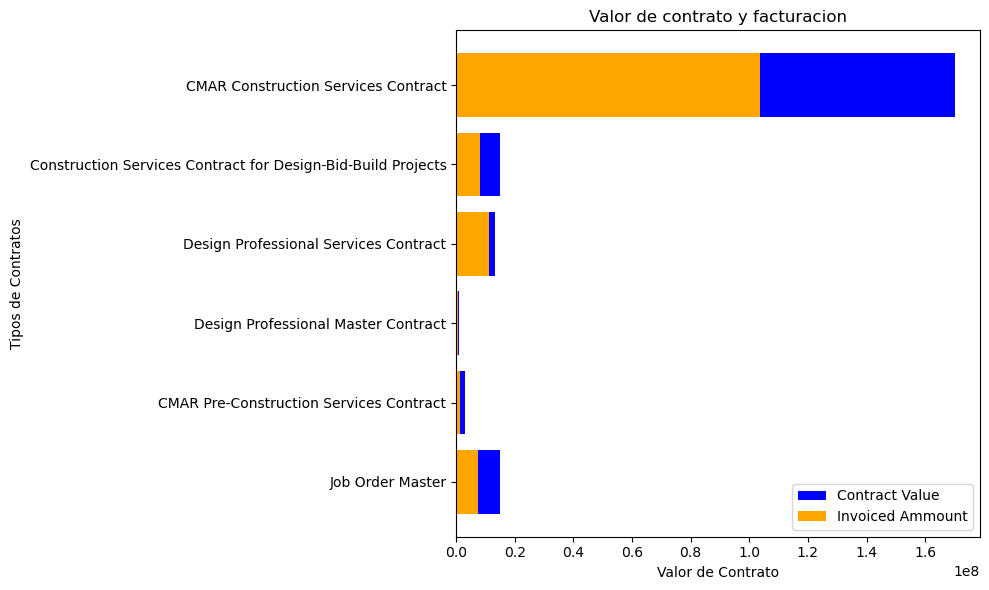

In [182]:

plt.figure(figsize=(10, 6))

# Plot total contract ammount
plt.barh(df["Contract_Type"], df["Contract_Total_Amount"], label="Contract Value", color="blue")

# Plot contract invoiced ammount
plt.barh(df["Contract_Type"], df["Total_Invoice_Ammount"], label="Invoiced Ammount", color="orange")



plt.xlabel("Valor de Contrato")
plt.ylabel("Tipos de Contratos")
plt.title("Valor de contrato y facturacion")
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
source_ContractType = pd.DataFrame(df.Contract_Type.value_counts()).reset_index().rename(columns={"index":"Contract_Type", "Contract_Type":"Frequency"})
source_ContractType

,Contract_Type,Frequency
0,Design Professional Master Contract,524
1,Design Professional Services Contract,255
2,Job Order Master,139
3,Construction Services Contract for Design-Bid-...,112
4,CMAR Construction Services Contract,76
5,CMAR Pre-Construction Services Contract,48


In [184]:
# Frecuencia de Tipos de Contratos
graph1=alt.Chart(source_ContractType).mark_bar().encode(
    alt.X('Contract_Type',  sort='-y'),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Contract_Type', legend=None),
    tooltip=['Contract_Type', 'Frequency']
).properties(title="Frecuencia de Tipos de Contratos",width=1000)

display(graph1)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [185]:
source_phase = pd.DataFrame(df.Phase.value_counts()).reset_index().rename(columns={"index":"Phase", "Phase":"Frequency"})
source_phase

,Phase,Frequency
0,102 - Design,651
1,104 - Construction,313
2,120 - Direct Expenses,13
3,118 - Grant - Construction,9
4,105 - Construction Admin.,2
5,101 - Pre-Design,1
6,103 - Land Acq.,1


In [186]:
# Frecuencias de Phases
graph2=alt.Chart(source_phase).mark_bar().encode(
    alt.X('Phase',  sort='-y', title="Categoría"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Phase', legend=None),
    tooltip=['Phase', 'Frequency']
).properties(title="Frecuencia de Fases")

display(graph2)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [187]:
source_contract = pd.DataFrame(df.Contract_Total_Amount.value_counts()).reset_index().rename(columns={"index":"Contract_Total_Amount", "Contract_Total_Amount":"Frequency"})

# # Histograma de valor de contratos
graph3=alt.Chart(source_contract).mark_bar().encode(
    alt.X('Contract_Total_Amount',bin=alt.Bin(maxbins=30), title="Contract_Total_Amount"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Contract_Total_Amount', legend=None),
    tooltip=['Contract_Total_Amount', 'Frequency']
).properties(title="Frecuencia de Valor de contrato",width=1000)

display(graph3)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


En esta gráfica, realizamos un análisis del valor del contrato a través de un histograma. Sin embargo, observamos que en nuestra base de datos existen valores extremadamente altos que pueden distorsionar la visualización y complicar el análisis. La presencia de estos outliers dificulta la identificación de patrones y tendencias claras en nuestros datos.

Para abordar este problema, podemos llevar a cabo la eliminación de outliers. Este proceso implica la identificación y exclusión de valores atípicos que se desvían significativamente de la tendencia general de los datos. Al eliminar estos valores extremos, podemos obtener una representación más precisa y legible de la distribución del valor del contrato.

La eliminación de outliers nos permitirá observar de manera más efectiva las tendencias y patrones en la mayoría de los datos, lo que, a su vez, facilitará la toma de decisiones informadas basadas en análisis sólidos y confiables.

In [188]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Contract_Total_Amount'].quantile(0.25)
Q3 = df['Contract_Total_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Contract_Total_Amount'] < lower_bound) | (df['Contract_Total_Amount'] > upper_bound)]

# Remove outliers from the DataFrame
df = df[(df['Contract_Total_Amount'] >= lower_bound) & (df['Contract_Total_Amount'] <= upper_bound)]



In [189]:
source_contract = pd.DataFrame(df.Contract_Total_Amount.value_counts()).reset_index().rename(columns={"index":"Contract_Total_Amount", "Contract_Total_Amount":"Frequency"})

# Histograma de valor de contratos
graph4=alt.Chart(source_contract).mark_bar().encode(
    alt.X('Contract_Total_Amount', bin=alt.Bin(maxbins=30), title="Contract_Total_Amount"),
    alt.Y('Frequency', title="Frecuencia"),
    alt.Color('Contract_Total_Amount', bin=True),
    tooltip=['Contract_Total_Amount', 'Frequency']
).properties(title="Histograma de frecuencia de precios",width=1000)

display(graph4)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


Tras el proceso de eliminación de outliers, ahora podemos hacer un análisis del histograma que representa la distribución de los valores de contrato. Este histograma revela patrones notables en los datos y proporciona una vista más precisa de la estructura subyacente.

In [190]:
# price, density function
graph5=alt.Chart(source_contract).transform_density(
    'Contract_Total_Amount',
    as_=['Contract_Total_Amount', 'density'],
).mark_area().encode(
    alt.X("Contract_Total_Amount:Q", title="Precio"),
    alt.Y('density:Q', title="Probabilidad"),
    tooltip=['Contract_Total_Amount']
).properties(title="Distribución de densidad de precios",width=1000)

display(graph5)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [191]:
source_time = pd.pivot_table(df, index=["Signed_date", "Contract_Type"], values=["Contract_Total_Amount"], aggfunc=np.mean, fill_value=0).reset_index()
source_time

,Signed_date,Contract_Type,Contract_Total_Amount
0,2009-06-16,Design Professional Services Contract,281182.200
1,2009-11-05,Design Professional Services Contract,31986.160
2,2010-04-19,Design Professional Services Contract,82127.350
3,2011-12-22,Design Professional Master Contract,1000000.000
4,2012-06-11,Design Professional Master Contract,1000000.000
...,...,...,...
480,2022-10-15,Design Professional Master Contract,1000000.000
481,2022-10-19,CMAR Pre-Construction Services Contract,506466.065
482,2022-10-21,Design Professional Master Contract,1000000.000
483,2022-11-07,Construction Services Contract for Design-Bid-...,809600.000


In [192]:
# Gráfica integrada
plot = alt.Chart(source_time).mark_line(size = 4).encode(
    alt.X('Signed_date:T', title="Fecha"),
    alt.Y('Contract_Total_Amount:Q', title="Contract_Total_Amount"),
    alt.Color('Contract_Type:N', title="Contract_Type")).properties(title="Precio promedio de productos a lo largo del tiempo",
                width=400, height=300
    )
plot

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [193]:
# Valor de contrato por tipo de contrato a lo largo del tiempo
graph6=plot.properties(width=200, height=200).facet(alt.Facet('Contract_Type:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Valor de contrato por tipo de contrato a lo largo del tiempo"], 
      "subtitle": ["Escalas independientes"],
      "color": "black",
      "subtitleColor": "grey"}
    )

display(graph6)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [194]:
source_ProfServ = df[df.Type_of_Service=="Professional Service"].reset_index()

# para la gráfica cree dos variables nuevas: mes y año
source_ProfServ['year'] = pd.DatetimeIndex(source_ProfServ['Signed_date']).year
source_ProfServ['month'] = pd.DatetimeIndex(source_ProfServ['Signed_date']).month

In [195]:
# Valor de contrato para servicios profesionales a lo largo del tiempo

graph7=alt.Chart(source_ProfServ).mark_rect().encode(
    alt.X("month:O", title = "Mes", axis = alt.Axis(labelAngle = 0)),
    alt.Y('year:O', title = "Año", sort="-y"),
    alt.Color('Contract_Total_Amount:Q', title = "Contract_Total_Amount"),
    tooltip=['year', 'month', 'Contract_Total_Amount']
).properties(title={
    "text": ["Valor de contrato para servicios profesionales a lo largo del tiempo"],
    "color": "black",
    "subtitleColor": "grey"},
             width=400, height=200)

display(graph7)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [196]:
source_Const = df[df.Type_of_Service=="Construction"].reset_index()

# para la gráfica cree dos variables nuevas: mes y año
source_Const['year'] = pd.DatetimeIndex(source_Const['Signed_date']).year
source_Const['month'] = pd.DatetimeIndex(source_Const['Signed_date']).month


In [197]:
#Valor de contrato para contratos de construccion a lo largo del tiempo

graph8=alt.Chart(source_Const).mark_rect().encode(
    alt.X("month:O", title = "Mes", axis = alt.Axis(labelAngle = 0)),
    alt.Y('year:O', title = "Año", sort="-y"),
    alt.Color('Contract_Total_Amount:Q', title = "Contract_Total_Amount"),
    tooltip=['year', 'month', 'Contract_Total_Amount']
).properties(title={
    "text": ["Valor de contrato para contratos de construccion a lo largo del tiempo"], 
    "color": "black",
    "subtitleColor": "grey"},
             width=400, height=200)

display(graph8)



<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [198]:
source = df.reset_index()
source['year'] = pd.DatetimeIndex(source['Signed_date']).year
source = pd.pivot_table(source, index=["Contract_Type", "Type_of_Service", "year"], values=["Contract_Total_Amount"],
                        aggfunc=np.mean, fill_value=0).reset_index()


In [199]:
# Valor de contrato por typo de contrato y año
graph9=alt.Chart(source).mark_point(opacity=0.8, size=100).encode(
    alt.X("Contract_Total_Amount", title = "Contract_Total_Amount", axis = alt.Axis(labelAngle = 0)),
    alt.Y('Contract_Type', title = "Contract_Type", sort="-y"),
    alt.Shape('Type_of_Service:N', title="Type_of_Service"),
    alt.Color('year:N', title="Año"),
    tooltip=['Type_of_Service', 'Contract_Type', 'year', 'Contract_Total_Amount']
).properties(title="Valor de contrato por typo de contrato y año", width=400, height=400)

display(graph9)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [200]:
# Comparacion del valor del contrato respecto a la duracion del contrato
graph10=alt.Chart(df).mark_circle().encode(
    x="Contract_Total_Amount:Q",
    y='Contract_Duration:Q',
    color="Type_of_Service:N",
)

display(graph10)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
